<a href="https://colab.research.google.com/github/Ian-Morris/COMP6915-Machine-Learning/blob/Javad-mun-patch-1/A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# New Section

### work with google drive

In [0]:
!ls "/content/gdrive/My Drive"


In [20]:

def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']
X_train, y_train = load_data("/content/gdrive/My Drive/train_32x32.mat")
X_test, y_test = load_data("/content/gdrive/My Drive/test_32x32.mat")

print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


**Transposing the the train and test data
by converting it from  
(width, height, channels, size) -> (size, width, height, channels)**

In [21]:
# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)

Total Number of Images 99289


In [0]:
# a function to show images . Note color and gray is different:

def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

If you want to see some of the images:

This image is: 3


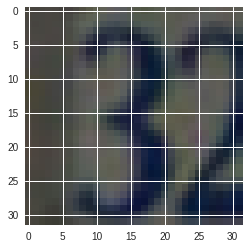

In [23]:
for i in range(133,134):
  print("This image is:",y_train[i])
  plt.imshow(X_train[i])
  plt.show()


(32, 32, 3)


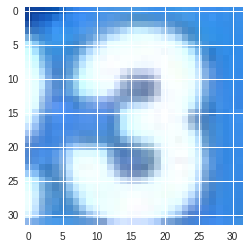

(32, 32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """


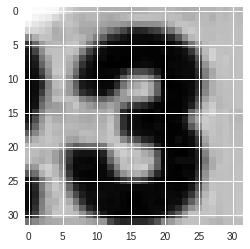

In [24]:
t_Object= X_train[3]
print(t_Object.shape)
plt.imshow(t_Object)
plt.show()
t_Object= np.expand_dims(np.dot(t_Object, [0.3333, 0.3333, 0.3333]), axis=3).astype(np.float32)
t_Object = t_Object[:,:,0]
print(t_Object.shape)
plt.imshow(t_Object)
  


## Splitting the Training to Train+Validation
Splitting to 13% in Val Set as it gives around 9500 data
having min. of 800 instances of each class

Using random state to regenrate the whole Dataset in re-run


In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13, random_state=7)


##  Grayscale Conversion
**To speed up our experiments we will convert our images from RGB to Grayscale, which grately reduces the amount of data we will have to process.**

In [26]:

def rgb2gray(images):
    return np.expand_dims(np.dot(images, [1, 1, 1]), axis=3)
train_greyscale = rgb2gray(X_train).astype(np.float32)
test_greyscale = rgb2gray(X_test).astype(np.float32)
print("Training Set", train_greyscale.shape)
print("Test Set", test_greyscale.shape)
print('')

Training Set (63733, 32, 32, 1)
Test Set (26032, 32, 32, 1)



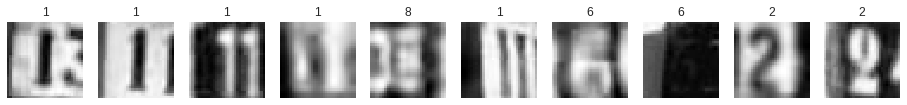

In [27]:
plot_images(train_greyscale, y_train, 1, 10)


In [0]:
# scale the data:

train_greyscale_norm = train_greyscale/255
test_greyscale_norm = test_greyscale/255


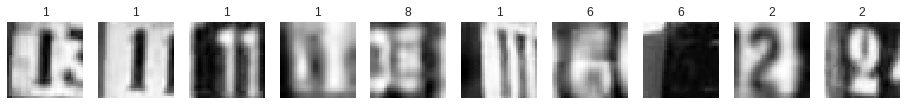

In [29]:
# check the images 
plot_images(train_greyscale_norm, y_train, 1, 10)


## One Hot Label Encoding
From the book, using keras

In [34]:
y_train.min()

1

In [0]:

#one hot encode outputs
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_val = np_utils.to_categorical(y_val)
num_classes = y_test.shape[1]

In [39]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [40]:

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (63733, 32, 32, 3) (63733, 11)
Validation set (9524, 32, 32, 3) (9524, 11)
Test set (26032, 32, 32, 3) (26032, 11)


In [45]:
train_greyscale_norm.shape


(63733, 32, 32, 1)

In [0]:
training_samples, height, width, _ = train_greyscale_norm.shape
testing_samples,_,_,_  = X_test.shape


In [0]:
#Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
#Importing the CNN related layers as described in Chapter 2
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

***The model:***

In [0]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(height,width ,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
n_classes = 11 # maybe I need to put it 11
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fit the model**

In [0]:
model.fit(train_greyscale_norm, y_train, validation_data=(test_greyscale_norm, y_test),
epochs=10, batch_size=200)

Instructions for updating:
Use tf.cast instead.
Train on 63733 samples, validate on 26032 samples
Epoch 1/10
63733/63733 [==============================] - 172s 3ms/step - loss: 1.0473 - acc: 0.6754 - val_loss: 0.6001 - val_acc: 0.8380
Epoch 2/10
63733/63733 [==============================] - 169s 3ms/step - loss: 0.5443 - acc: 0.8465 - val_loss: 0.5338 - val_acc: 0.8572
Epoch 3/10
63733/63733 [==============================] - 172s 3ms/step - loss: 0.4594 - acc: 0.8689 - val_loss: 0.4578 - val_acc: 0.8734
Epoch 4/10
63733/63733 [==============================] - 172s 3ms/step - loss: 0.4053 - acc: 0.8837 - val_loss: 0.4301 - val_acc: 0.8781
Epoch 5/10
63733/63733 [==============================] - 171s 3ms/step - loss: 0.3664 - acc: 0.8930 - val_loss: 0.4199 - val_acc: 0.8803
Epoch 6/10
63733/63733 [==============================] - 169s 3ms/step - loss: 0.3358 - acc: 0.9014 - val_loss: 0.3941 - val_acc: 0.8900
Epoch 7/10
63733/63733 [==============================] - 171s 3ms/step - 